# breast_cancer 베스트모델, early stopping, graph

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data ,columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X = cancer.data
Y = cancer.target
X.shape, Y.shape

((569, 30), (569,))

In [5]:
# 모델 설정
model = Sequential([
    Dense(40, input_dim=30, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
]) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                1240      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                492       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,845
Trainable params: 1,845
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [8]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

In [9]:
# checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1)
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [10]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [11]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer,early_stopping_callback])


Epoch 00001: val_loss improved from inf to 0.69504, saving model to ./model/best001-0.6950.hdf5

Epoch 00002: val_loss improved from 0.69504 to 0.69128, saving model to ./model/best002-0.6913.hdf5

Epoch 00003: val_loss improved from 0.69128 to 0.68844, saving model to ./model/best003-0.6884.hdf5

Epoch 00004: val_loss improved from 0.68844 to 0.61984, saving model to ./model/best004-0.6198.hdf5

Epoch 00005: val_loss did not improve from 0.61984

Epoch 00006: val_loss improved from 0.61984 to 0.61545, saving model to ./model/best006-0.6155.hdf5

Epoch 00007: val_loss did not improve from 0.61545

Epoch 00008: val_loss did not improve from 0.61545

Epoch 00009: val_loss improved from 0.61545 to 0.58608, saving model to ./model/best009-0.5861.hdf5

Epoch 00010: val_loss improved from 0.58608 to 0.58485, saving model to ./model/best010-0.5848.hdf5

Epoch 00011: val_loss did not improve from 0.58485

Epoch 00012: val_loss did not improve from 0.58485

Epoch 00013: val_loss improved from 


Epoch 00134: val_loss did not improve from 0.48169

Epoch 00135: val_loss improved from 0.48169 to 0.48073, saving model to ./model/best135-0.4807.hdf5

Epoch 00136: val_loss did not improve from 0.48073

Epoch 00137: val_loss did not improve from 0.48073

Epoch 00138: val_loss did not improve from 0.48073

Epoch 00139: val_loss did not improve from 0.48073

Epoch 00140: val_loss did not improve from 0.48073

Epoch 00141: val_loss did not improve from 0.48073

Epoch 00142: val_loss did not improve from 0.48073

Epoch 00143: val_loss did not improve from 0.48073

Epoch 00144: val_loss improved from 0.48073 to 0.47781, saving model to ./model/best144-0.4778.hdf5

Epoch 00145: val_loss did not improve from 0.47781

Epoch 00146: val_loss did not improve from 0.47781

Epoch 00147: val_loss did not improve from 0.47781

Epoch 00148: val_loss did not improve from 0.47781

Epoch 00149: val_loss did not improve from 0.47781

Epoch 00150: val_loss improved from 0.47781 to 0.47221, saving model 

In [12]:
del model

In [13]:
from tensorflow.keras.models import load_model
model = load_model('model/best189-0.4435.hdf5')

In [14]:
# 베스트 모델의 결과 출력 
model.evaluate(X, Y,verbose=2)[1]

569/569 - 0s - loss: 0.3901 - accuracy: 0.9543


0.9543058

In [15]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

In [16]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

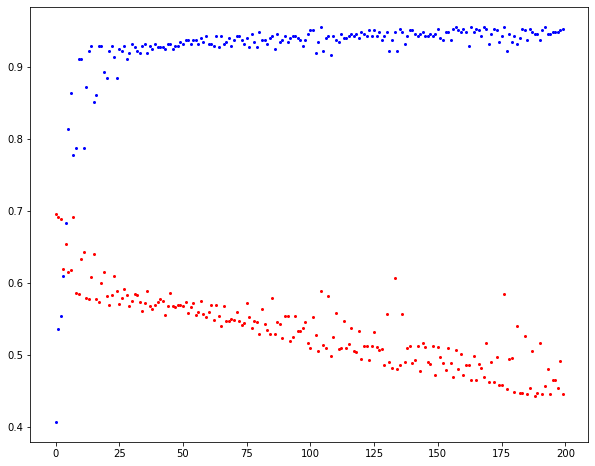

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(10,8))
#plt.ylim(0,1)
plt.plot(x_len, y_vloss, "o", c="red", markersize=2)
plt.plot(x_len, y_acc, "o", c="blue", markersize=2)
plt.show()

In [18]:
# y_vacc에 테스트셋으로 실험 결과의 정확도를 저장
y_vacc=history.history['val_accuracy']

In [19]:
# y_loss에 학습셋으로 측정한 오차 값을 저장
y_loss=history.history['loss']

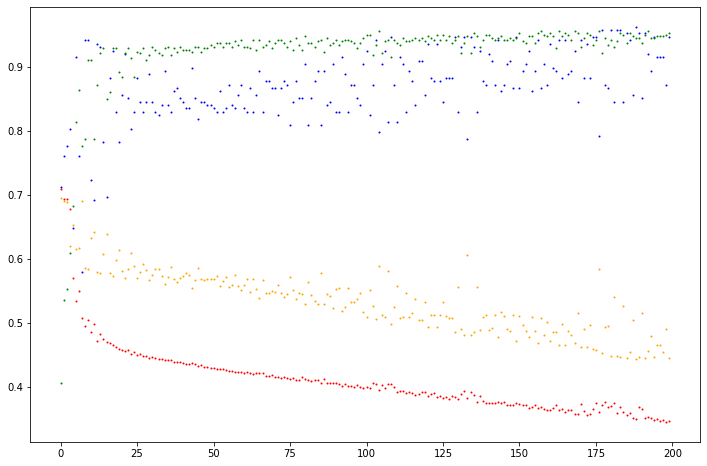

In [20]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
#plt.ylim(0,1)
plt.plot(x_len, y_loss, "o", c="red", markersize=1)
plt.plot(x_len, y_vacc, "o", c="blue", markersize=1)
plt.plot(x_len, y_vloss, "o", c="orange", markersize=1)
plt.plot(x_len, y_acc, "o", c="green", markersize=1)
plt.show()

# load digits

In [21]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [22]:
digits = load_digits()
df = pd.DataFrame(digits.data ,columns=digits.feature_names)
X = digits.data
Y = digits.target
X.shape, Y.shape

((1797, 64), (1797,))

In [23]:
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(Y)
Y = e.transform(Y)

In [24]:
# One hot encoding
Y_encoded = tf.keras.utils.to_categorical(Y)

In [25]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, 
                                                    random_state=seed)

In [27]:
X_train.shape, Y_train.shape

((1437, 64), (1437, 10))

In [28]:
# 모델 설정
model1 = Sequential([
    Dense(100, input_dim=64, activation='relu'),
    Dense(50, activation='relu'),
    Dense(35, activation='relu'),
    Dense(10, activation='softmax')
]) 
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 35)                1785      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                360       
Total params: 13,695
Trainable params: 13,695
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 모델 컴파일 
model1.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [30]:
model1.fit(X_train, Y_train, validation_split=0.2, epochs=500, batch_size=10, callbacks=[early_stopping_callback])

Train on 1149 samples, validate on 288 samples
Epoch 1/500
1149/1149 [==============================] - 0s 391us/sample - loss: 1.2333 - accuracy: 0.6562 - val_loss: 0.4038 - val_accuracy: 0.8819
Epoch 2/500
1149/1149 [==============================] - 0s 107us/sample - loss: 0.2744 - accuracy: 0.9173 - val_loss: 0.2175 - val_accuracy: 0.9375
Epoch 3/500
1149/1149 [==============================] - 0s 108us/sample - loss: 0.1531 - accuracy: 0.9539 - val_loss: 0.1547 - val_accuracy: 0.9549
Epoch 4/500
1149/1149 [==============================] - 0s 108us/sample - loss: 0.0908 - accuracy: 0.9730 - val_loss: 0.1067 - val_accuracy: 0.9688
Epoch 5/500
1149/1149 [==============================] - 0s 110us/sample - loss: 0.0559 - accuracy: 0.9826 - val_loss: 0.1106 - val_accuracy: 0.9653
Epoch 6/500
1149/1149 [==============================] - 0s 112us/sample - loss: 0.0406 - accuracy: 0.9904 - val_loss: 0.1097 - val_accuracy: 0.9549
Epoch 7/500
1149/1149 [==============================] - 0s

1149/1149 [==============================] - 0s 106us/sample - loss: 7.9255e-07 - accuracy: 1.0000 - val_loss: 0.1049 - val_accuracy: 0.9757
Epoch 108/500
1149/1149 [==============================] - 0s 104us/sample - loss: 7.6972e-07 - accuracy: 1.0000 - val_loss: 0.1111 - val_accuracy: 0.9757
Epoch 109/500
1149/1149 [==============================] - 0s 105us/sample - loss: 7.0280e-07 - accuracy: 1.0000 - val_loss: 0.1064 - val_accuracy: 0.9757
Epoch 110/500
1149/1149 [==============================] - 0s 106us/sample - loss: 6.7012e-07 - accuracy: 1.0000 - val_loss: 0.1133 - val_accuracy: 0.9757
Epoch 111/500
1149/1149 [==============================] - 0s 106us/sample - loss: 6.1078e-07 - accuracy: 1.0000 - val_loss: 0.1089 - val_accuracy: 0.9757
Epoch 112/500
1149/1149 [==============================] - 0s 108us/sample - loss: 5.7758e-07 - accuracy: 1.0000 - val_loss: 0.1113 - val_accuracy: 0.9757
Epoch 113/500
1149/1149 [==============================] - 0s 106us/sample - loss: 5

In [31]:
model1.evaluate(X_test, Y_test, verbose=2)[1]

360/360 - 0s - loss: 0.1170 - accuracy: 0.9861


0.9861111